### Visualisation and Analysis of Suicides In Russia


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Downloads/who_suicide_statistics.csv')

In [11]:
df.isnull().sum()#number of missing values
df.dropna(axis=0,inplace=True) # deleting null values
df.shape #new shape after deleteion of values

(36060, 6)

In [12]:
RUSSIA = df[df['country']=='Russian Federation']

In [13]:
RUSSIA.head()

,country,year,sex,age,suicides_no,population
32952,Russian Federation,1980,female,15-24 years,869.0,11983700.0
32953,Russian Federation,1980,female,25-34 years,1203.0,11013000.0
32954,Russian Federation,1980,female,35-54 years,3859.0,19316800.0
32955,Russian Federation,1980,female,5-14 years,39.0,9507900.0
32956,Russian Federation,1980,female,55-74 years,3076.0,14083800.0


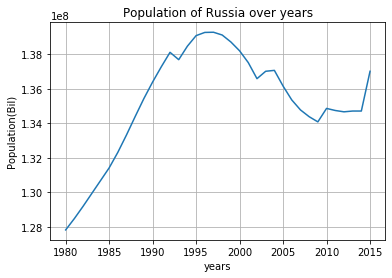

In [14]:
years = np.unique(RUSSIA.year)

a = []
dict = {}
for i in years:
    sum = RUSSIA[RUSSIA['year']==i]['population'].values.sum()
    dict[i] = sum 
a.append(dict)
RUSyear_df = pd.DataFrame(a)
RUSyear_df = np.transpose(RUSyear_df) #correction of length missmatch if any
RUSyear_df.columns = ['Population'] 

plt.plot(RUSyear_df)
plt.title('Population of Russia over years')
plt.xlabel('years')
plt.ylabel('Population(Bil)')
plt.grid()
plt.show()

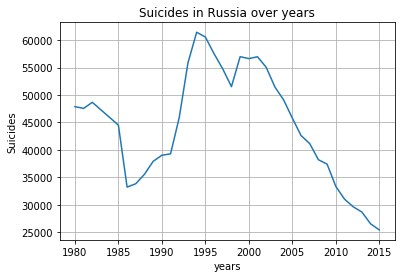

In [15]:

years = np.unique(RUSSIA.year)

a = []
dict = {}
for i in years:
    sum = RUSSIA[RUSSIA['year']==i]['suicides_no'].values.sum()
    dict[i] = sum 
a.append(dict)
RUSyear_df = pd.DataFrame(a)
RUSyear_df = np.transpose(RUSyear_df) #correction of length missmatch if any
RUSyear_df.columns = ['Suicides'] 

plt.plot(RUSyear_df)
plt.title('Suicides in Russia over years')
plt.xlabel('years')
plt.ylabel('Suicides')
plt.grid()
plt.show()


### AGE


Text(0.5, 1.0, 'Suicide Pattern in Russia')

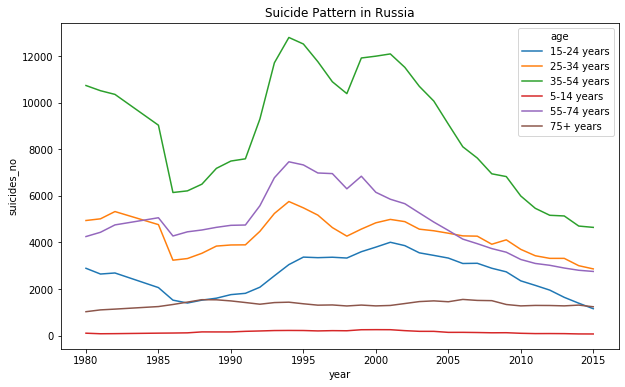

In [34]:
plt.figure(figsize = (10,6))
sns.lineplot(x='year',y='suicides_no',hue='age',data=df[df['country'] == 'Russian Federation'],ci=None )
plt.title('Suicide Pattern in Russia')

### Gender

Text(0.5, 1.0, 'Suicide Pattern in Russia')

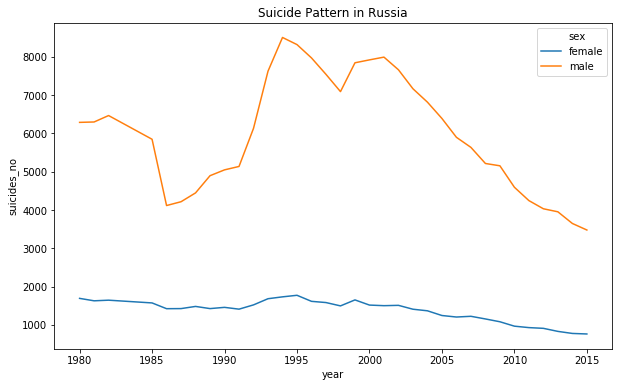

In [35]:
plt.figure(figsize = (10,6))
sns.lineplot(x='year',y='suicides_no',hue='sex',data=df[df['country'] == 'Russian Federation'],ci=None )
plt.title('Suicide Pattern in Russia')

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [17]:
RUS_data = RUSSIA.values
year = RUS_data[:,1]
x = np.unique(year).reshape(-1,1)
y = RUSyear_df.Suicides.values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state= 42)

In [18]:

reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print("Testing data:",reg.score(x_test,y_test))
print("Training data:",reg.score(x_train,y_train))

Testing data: 0.1341895625559123
Training data: 0.11587566560699769


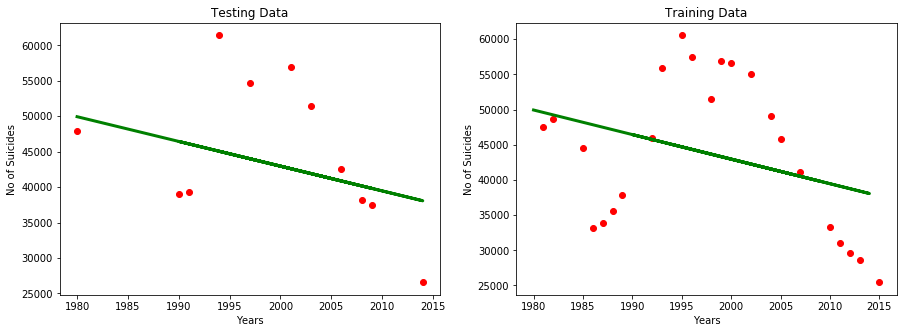

In [19]:
plt.figure(figsize=(15,5))
#plot for testing data
plt.subplot(121)
plt.scatter(x_test, y_test,  c ='red')
plt.plot(x_test, y_pred, c ='green', linewidth=3)
plt.title('Testing Data')
plt.xlabel('Years')
plt.ylabel('No of Suicides')

#plot for training data
plt.subplot(122)
plt.scatter(x_train, y_train,  c ='red')
plt.plot(x_test, y_pred, c ='green', linewidth=3)
plt.title('Training Data')
plt.xlabel('Years')
plt.ylabel('No of Suicides')
plt.show()

In [20]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-349.12427931]
Variance score: 0.13


In [21]:
f = np.array(2016)
print(reg.predict(f.reshape(-1,1)))

[37370.82831518]


### Polynomial Regression


0.6669729220157893


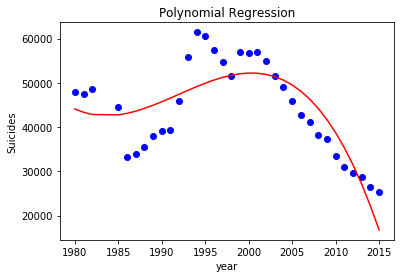

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3) # Checked that it gives a better r2 score
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)

lin2 = LinearRegression()
lin2.fit(X_poly,y)
print(lin2.score(X_poly,y))

plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Suicides")
plt.show()

In [33]:
print('Coefficients: \n', lin2.coef_)
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print("r2 score :", r2 )


Coefficients: 
 [ 0.00000000e+00 -4.92143300e+07  2.47069501e+04 -4.13445055e+00]
r2 score : 0.6669729220157892
